# Machine Learning-Based Classification of Parkinson’s Disease

## Problem Statement
Parkinson's disease is a progressive neurological disorder that affects movement. This project aims to build machine learning and deep learning models that can classify individuals as either having Parkinson's disease or being healthy, based on structured voice measurements and medical images.


## Data Set
- **Structured Data**: Parkinson’s Disease dataset (`parkinsons disease.csv`) consisting of biomedical voice measurements.
- **Image Data**: Medical scan images labeled as `healthy` or `parkinsons`.
The dataset is split into training, validation, and testing sets for both modalities.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = "parkinsons_classification"
image_dir = os.path.join(base_dir, "images")
output_dir = os.path.join(base_dir, "data")

folder_map = {
    "parkinsons": "pd",
    "healthy": "non_pd"
}

image_paths = []
labels = []

for folder_name, label in folder_map.items():
    class_path = os.path.join(image_dir, folder_name)
    if not os.path.exists(class_path):
        raise FileNotFoundError(f"❌ Folder not found: {class_path}")
    for fname in os.listdir(class_path):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(class_path, fname))
            labels.append(label)

print(f"📸 Total images found: {len(image_paths)}")

# Spliting the data
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.10, stratify=labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

splits = [('train', X_train, y_train), ('val', X_val, y_val), ('test', X_test, y_test)]

for split_name, X_split, y_split in splits:
    for img_path, label in zip(X_split, y_split):
        dest_dir = os.path.join(output_dir, split_name, label)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dest_dir, os.path.basename(img_path)))

print("✅ Split complete! Check the 'data/' folder.")


📸 Total images found: 5083
✅ Split complete! Check the 'data/' folder.


In [ ]:
import pandas as pd
csv_path = 'parkinsons_classification/parkinsons disease.csv'
df = pd.read_csv("parkinsons_classification/parkinsons diease data.csv")

print(f"Shape: {df.shape}")
 # Show top 10 rows
import numpy as np
data = pd.read_csv("parkinsons_classification/parkinsons diease data.csv")
X = data.select_dtypes(include=[np.number]).drop(columns=["Diagnosis"], errors='ignore')
y = data['Diagnosis']
df.columns = df.columns.str.strip().str.lower() 
print(df.columns.tolist())


X = data.select_dtypes(include=[np.number]).drop(columns=["Diagnosis"], errors='ignore')
y = data['Diagnosis']
df.head(10) 

Shape: (2105, 35)
['patientid', 'age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking', 'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality', 'familyhistoryparkinsons', 'traumaticbraininjury', 'hypertension', 'diabetes', 'depression', 'stroke', 'systolicbp', 'diastolicbp', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl', 'cholesteroltriglycerides', 'updrs', 'moca', 'functionalassessment', 'tremor', 'rigidity', 'bradykinesia', 'posturalinstability', 'speechproblems', 'sleepdisorders', 'constipation', 'diagnosis', 'doctorincharge']


,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,...,functionalassessment,tremor,rigidity,bradykinesia,posturalinstability,speechproblems,sleepdisorders,constipation,diagnosis,doctorincharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
5,3063,68,1,2,1,39.423311,1,13.596889,7.796704,7.070239,...,6.824779,0,0,0,0,0,0,0,0,DrXXXConfid
6,3064,78,1,0,0,30.542003,1,2.011281,9.028536,9.838446,...,0.502747,1,0,0,0,1,0,0,0,DrXXXConfid
7,3065,70,1,0,0,36.758282,1,19.988866,3.891749,3.421960,...,1.190611,1,0,0,1,0,0,1,1,DrXXXConfid
8,3066,80,0,2,1,22.380587,1,7.293288,2.595670,4.784827,...,3.438111,0,0,0,0,0,0,0,1,DrXXXConfid
9,3067,71,0,3,2,23.727086,1,17.782910,7.344890,3.393018,...,5.346982,0,0,0,0,0,1,0,0,DrXXXConfid


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('parkinsons_classification\parkinsons diease data.csv')


if 'name' in df.columns:
    df = df.drop(columns=['name'])

# Select numeric columns as features, excluding the target column "Diagnosis"
X = df.select_dtypes(include=[np.number]).drop(columns=['Diagnosis'], errors='ignore')

# Target variable
y = df['Diagnosis']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Feature shape: {X_train.shape[1]} features")




Training samples: 1684, Test samples: 421
Feature shape: 33 features


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'parkinsons_classification/data/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    'parkinsons_classification/data/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')


Found 4065 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


##  Selected Models

**Structured Data (CSV):**
- Logistic Regression
- Random Forest
- XGBoost
- Support Vector Machine (SVM)

**Image Data:**
- CNN (Convolutional Neural Network)
- ResNet50 (Transfer Learning)



🔍 Training Logistic Regression...
✅ Accuracy: 0.8005
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.78      0.79       421
weighted avg       0.80      0.80      0.80       421



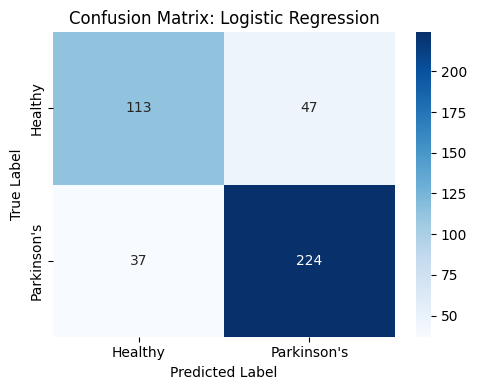


🔍 Training Random Forest...
✅ Accuracy: 0.9287
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       160
           1       0.94      0.95      0.94       261

    accuracy                           0.93       421
   macro avg       0.93      0.92      0.92       421
weighted avg       0.93      0.93      0.93       421



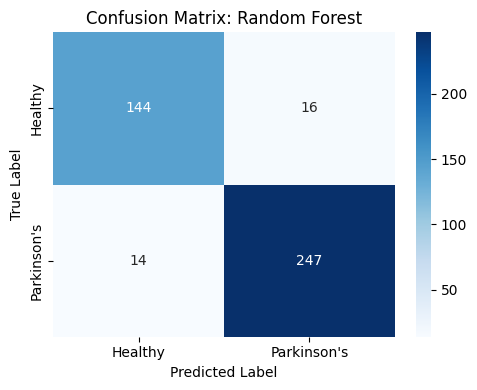


🔍 Training XGBoost...


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9430
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       160
           1       0.96      0.95      0.95       261

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421



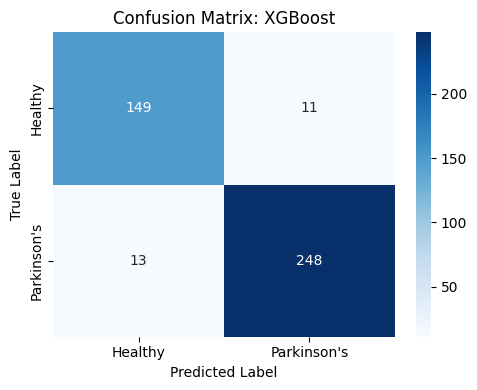


🔍 Training SVM (SVC)...
✅ Accuracy: 0.8337
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       160
           1       0.84      0.90      0.87       261

    accuracy                           0.83       421
   macro avg       0.83      0.81      0.82       421
weighted avg       0.83      0.83      0.83       421



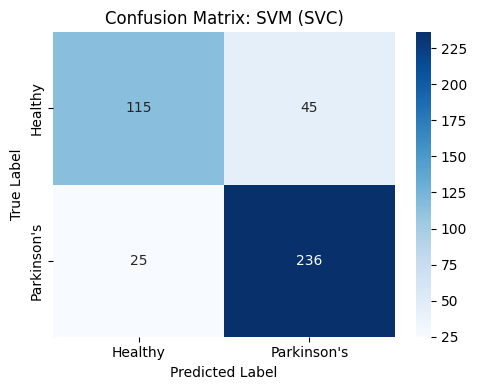

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42),
    'SVM (SVC)': SVC(kernel='rbf', probability=True, random_state=42)
}


for name, model in models.items():
    print(f"\n🔍 Training {name}...")

    if name in ["Logistic Regression", "SVM (SVC)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


Total corrupted images removed from parkinsons_classification/data/train: 0
Total corrupted images removed from parkinsons_classification/data/val: 0
Found 4065 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,457 (45.64 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6356 - loss: 0.7641 - val_accuracy: 0.8062 - val_loss: 0.4318
Epoch 2/10
  1/127 ━━━━━━━━━━━━━━━━━━━━ 1:43 825ms/step - accuracy: 0.7188 - loss: 0.5823

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7188 - loss: 0.5823 - val_accuracy: 0.8104 - val_loss: 0.4316
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7529 - loss: 0.4952 - val_accuracy: 0.8562 - val_loss: 0.3836
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8438 - loss: 0.4348 - val_accuracy: 0.8604 - val_loss: 0.3769
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7923 - loss: 0.4440 - val_accuracy: 0.8146 - val_loss: 0.3735
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6250 - loss: 0.6692 - val_accuracy: 0.8167 - val_loss: 0.3687
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7958 - loss: 0.4179 - val_accuracy: 0.7083 - val_loss: 0.9298
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7188 - loss: 0.9047 - val_accuracy: 0.8438 - val_loss: 0.4176
Epoch 9/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.7705 - loss: 0.4760 - val_accuracy: 0.862

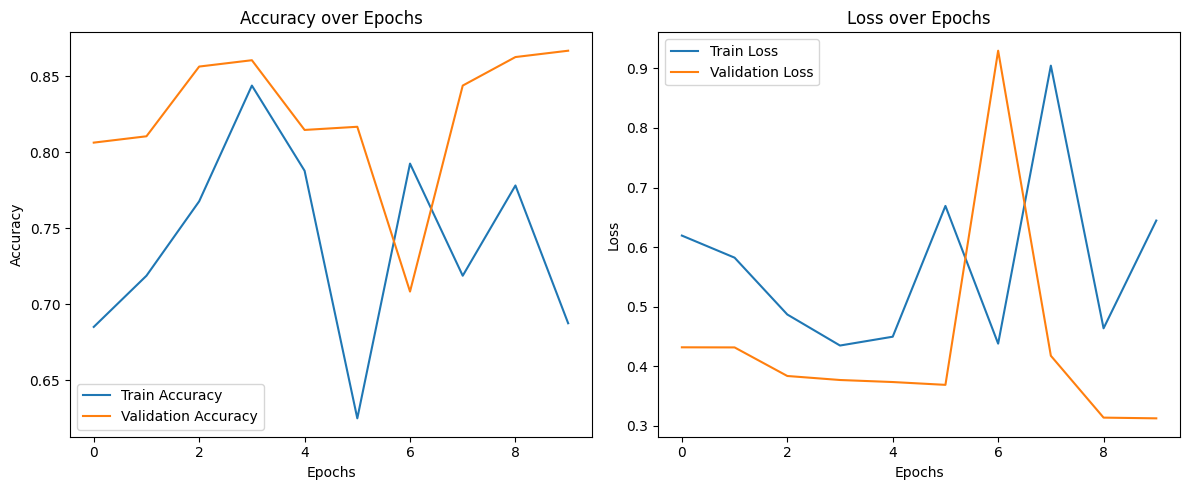

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step


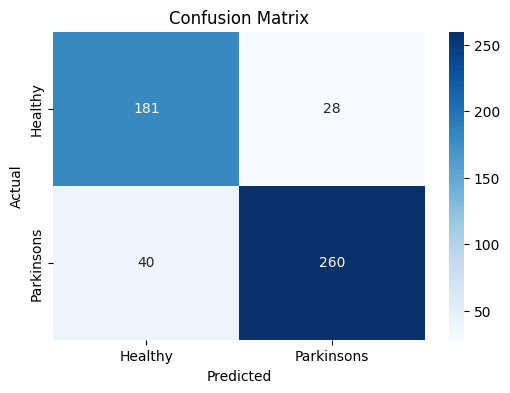

Classification Report:

              precision    recall  f1-score   support

     Healthy       0.82      0.87      0.84       209
  Parkinsons       0.90      0.87      0.88       300

    accuracy                           0.87       509
   macro avg       0.86      0.87      0.86       509
weighted avg       0.87      0.87      0.87       509



In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Function to remove corrupted images ---
def remove_bad_images(folder_path):
    bad_images = []
    for root, _, files in os.walk(folder_path):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                img = Image.open(fpath)
                img.verify()  
            except (IOError, SyntaxError):
                print(f"Removing corrupted image: {fpath}")
                bad_images.append(fpath)
                os.remove(fpath)  # Delete bad image
    print(f"Total corrupted images removed from {folder_path}: {len(bad_images)}")



remove_bad_images('parkinsons_classification/data/train')
remove_bad_images('parkinsons_classification/data/val')



img_size = (224, 224)
batch_size = 32



train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    directory='parkinsons_classification/data/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory='parkinsons_classification/data/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
    verbose=1
)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()



y_true = val_generator.classes
y_pred_prob = cnn_model.predict(val_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Healthy', 'Parkinsons']))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
True label distribution in this batch: [17 15]
Image 1: Predicted = 0, True = 0
Image 2: Predicted = 1, True = 0
Image 3: Predicted = 0, True = 0
Image 4: Predicted = 1, True = 0
Image 5: Predicted = 1, True = 0
Image 6: Predicted = 1, True = 0
Image 7: Predicted = 1, True = 0
Image 8: Predicted = 1, True = 0
Image 9: Predicted = 1, True = 0
Image 10: Predicted = 1, True = 0
Image 11: Predicted = 1, True = 0
Image 12: Predicted = 0, True = 0
Image 13: Predicted = 0, True = 0
Image 14: Predicted = 0, True = 0
Image 15: Predicted = 0, True = 0
Image 16: Predicted = 1, True = 0
Image 17: Predicted = 1, True = 0
Image 18: Predicted = 0, True = 1
Image 19: Predicted = 0, True = 1
Image 20: Predicted = 0, True = 1
Image 21: Predicted = 0, True = 1
Image 22: Predicted = 0, True = 1
Image 23: Predicted = 1, True = 1
Image 24: Predicted = 1, True = 1
Image 25: Predicted = 1, True = 1
Image 26: Predicted = 1, True = 1
Image 27: Predicted = 1, True = 1
Image

C:\Users\harsh\AppData\Local\Temp\ipykernel_17800\3205069526.py:56: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\harsh\AppData\Local\Temp\ipykernel_17800\3205069526.py:56: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


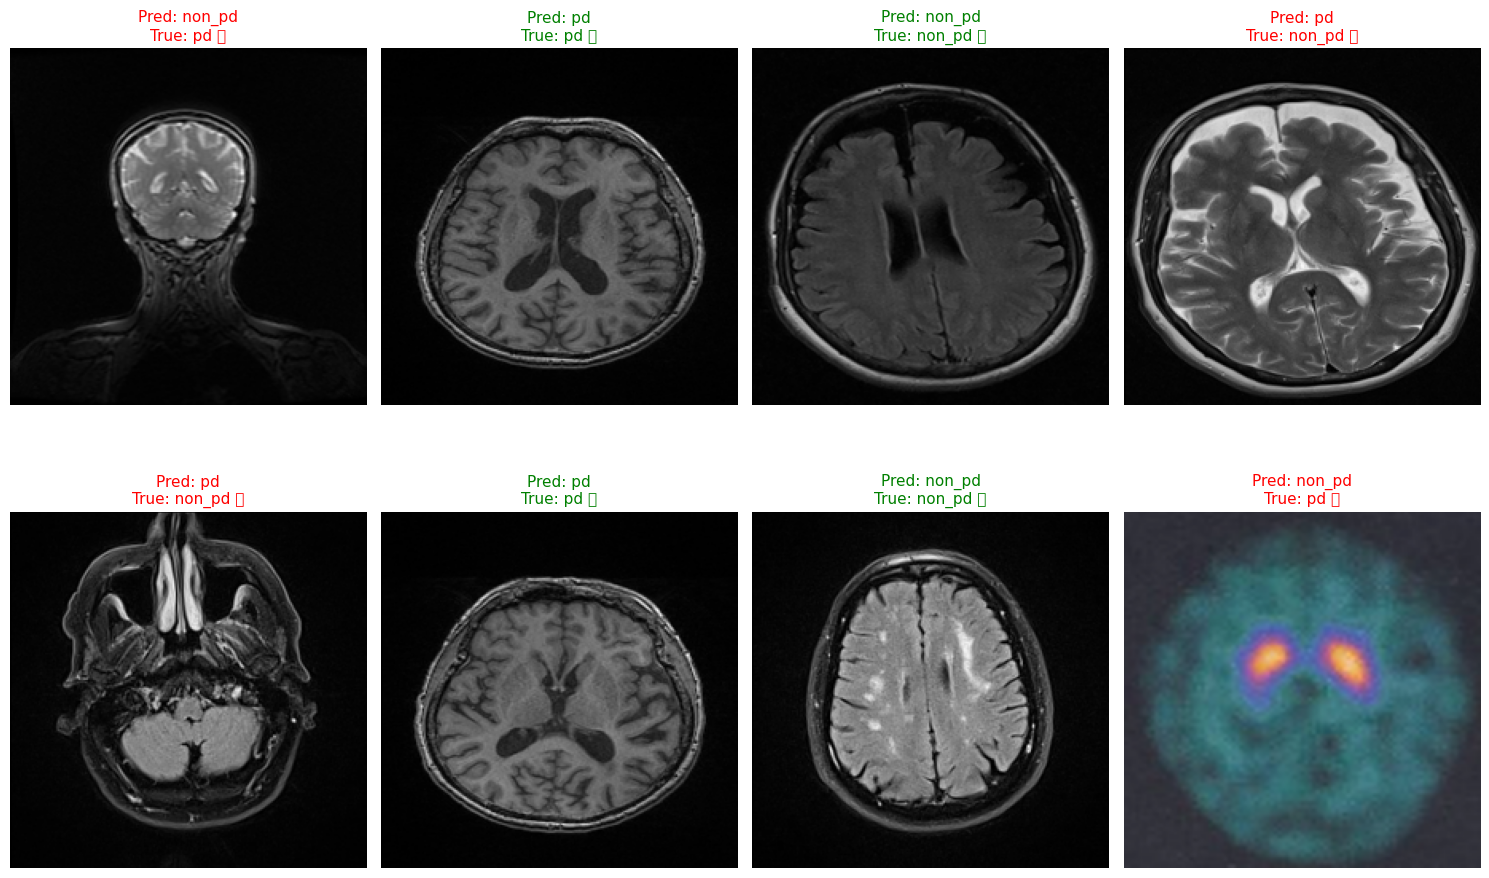

In [ ]:
# Visualization of CNN Model Predictions vs True Labels on a Validation Batch
import matplotlib.pyplot as plt
import numpy as np
import random

model = cnn_model 


val_generator.reset()

class_labels = list(val_generator.class_indices.keys())

found_both_classes = False
for i in range(len(val_generator)):
    images, labels = next(val_generator)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        found_both_classes = True
        break

if not found_both_classes:
    print("Still got only one class in batch. Try increasing dataset balance or batch size.")


# Predict using CNN model
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

print("True label distribution in this batch:", np.bincount(labels.astype(int)))

for i in range(len(pred_labels)):
    print(f"Image {i+1}: Predicted = {pred_labels[i]}, True = {int(labels[i])}")

num_images = 8
indices = random.sample(range(len(images)), num_images)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    
    true_label = class_labels[int(labels[idx])]
    pred_label = class_labels[int(pred_labels[idx])]
    color = 'green' if true_label == pred_label else 'red'
    status = "✅" if true_label == pred_label else "❌"
    
    plt.title(f"Pred: {pred_label}\nTrue: {true_label} {status}", color=color, fontsize=11)

plt.tight_layout()
plt.show()



## Evaluation Criterion

Models are evaluated using:
- **Accuracy**: Overall correctness of the model.
- **Confusion Matrix**: Visual breakdown of predictions vs actuals.
- **Classification Report**: Includes Precision, Recall, F1-score.
- **ROC AUC Score**: Measures model's ability to distinguish between classes.

Cross-validation ROC AUC scores:
Logistic Regression: Mean ROC AUC = 0.9633 ± 0.0041
Random Forest: Mean ROC AUC = 0.9955 ± 0.0016
SVM: Mean ROC AUC = 0.9686 ± 0.0041


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:19:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:20:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:20:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

XGBoost: Mean ROC AUC = 0.9957 ± 0.0013
Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RF CV ROC AUC: 0.9958


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Logistic Regression Performance on Test Set:
Accuracy: 0.9184
              precision    recall  f1-score   support

     Healthy       0.91      0.89      0.90       417
 Parkinson's       0.93      0.94      0.93       600

    accuracy                           0.92      1017
   macro avg       0.92      0.91      0.92      1017
weighted avg       0.92      0.92      0.92      1017



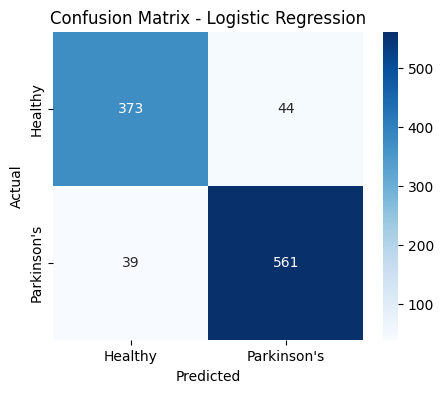


Random Forest Performance on Test Set:
Accuracy: 0.9744
              precision    recall  f1-score   support

     Healthy       0.97      0.97      0.97       417
 Parkinson's       0.98      0.98      0.98       600

    accuracy                           0.97      1017
   macro avg       0.97      0.97      0.97      1017
weighted avg       0.97      0.97      0.97      1017



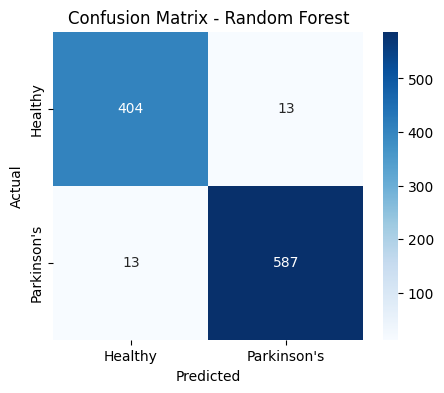


SVM Performance on Test Set:
Accuracy: 0.9105
              precision    recall  f1-score   support

     Healthy       0.86      0.94      0.90       417
 Parkinson's       0.95      0.89      0.92       600

    accuracy                           0.91      1017
   macro avg       0.91      0.91      0.91      1017
weighted avg       0.91      0.91      0.91      1017



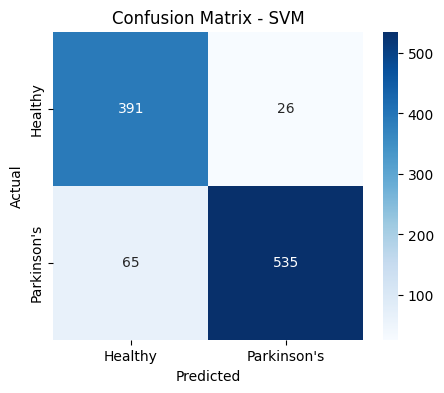


XGBoost Performance on Test Set:
Accuracy: 0.9754
              precision    recall  f1-score   support

     Healthy       0.97      0.97      0.97       417
 Parkinson's       0.98      0.98      0.98       600

    accuracy                           0.98      1017
   macro avg       0.97      0.97      0.97      1017
weighted avg       0.98      0.98      0.98      1017



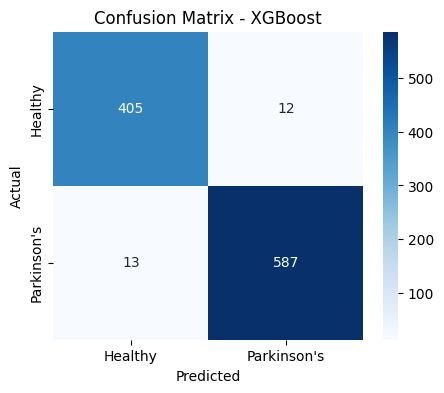

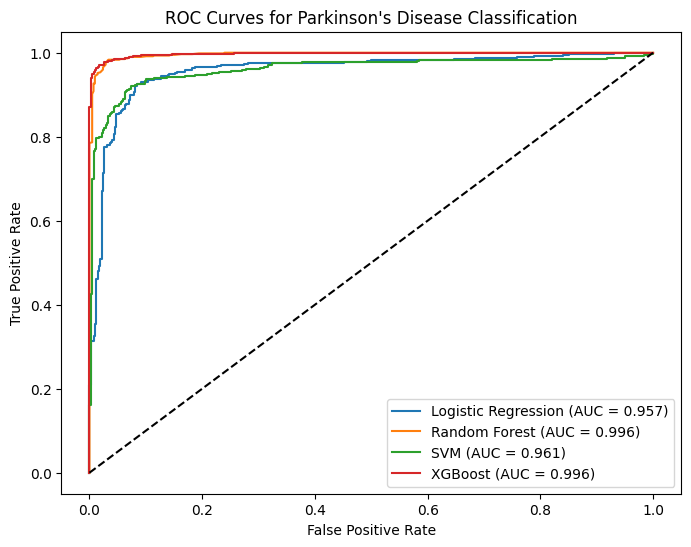

In [ ]:
# TRADITIONAL ML MODELS 
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Data Loading ===
base_train_folder = r'parkinsons_classification\images'
folder_healthy = os.path.join(base_train_folder, 'healthy')
folder_parkinsons = os.path.join(base_train_folder, 'parkinsons')
image_size = (64, 64)

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        try:
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Warning: Could not process {filename}: {e}")
    return images, labels

X_healthy, y_healthy = load_images_from_folder(folder_healthy, 0)
X_pd, y_pd = load_images_from_folder(folder_parkinsons, 1)

X = np.array(X_healthy + X_pd)
y = np.array(y_healthy + y_pd)

# === 2. Train-test split (final hold-out test set) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling for Logistic Regression and SVM 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 3. Define models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# === 4. Cross-validation with ROC AUC scoring ===
print("Cross-validation ROC AUC scores:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        scores = cross_val_score(model, scaler.fit_transform(X_train), y_train, cv=cv, scoring='roc_auc')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"{name}: Mean ROC AUC = {scores.mean():.4f} ± {scores.std():.4f}")

# === 5. Hyperparameter tuning example for Random Forest ===
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=cv, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
print(f"Best RF params: {grid_search_rf.best_params_}")
print(f"Best RF CV ROC AUC: {grid_search_rf.best_score_:.4f}")

# Replace RF model with best estimator
models['Random Forest'] = grid_search_rf.best_estimator_

# === 6. Train all models on full train set ===
for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

# === 7. Evaluate on hold-out test set ===
for name, model in models.items():
    print(f"\n{name} Performance on Test Set:")
    if name in ["Logistic Regression", "SVM"]:
        X_eval = X_test_scaled
    else:
        X_eval = X_test
    
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_eval)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=["Healthy", "Parkinson's"]))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Healthy", "Parkinson's"],
                yticklabels=["Healthy", "Parkinson's"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# === 8. Plot ROC Curves ===
plt.figure(figsize=(8,6))

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        X_eval = X_test_scaled
    else:
        X_eval = X_test
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_eval)[:, 1]
    else:  # for models like SVM with decision_function only
        y_prob = model.decision_function(X_eval)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Parkinson's Disease Classification")
plt.legend()
plt.show()


In [ ]:
# CROSS VALIDATION 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_idx, val_idx in kf.split(X, y):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    y_val_probs = rf.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_val_probs)
    auc_scores.append(auc)

print(f"Mean ROC AUC (5-fold CV): {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")


Mean ROC AUC (5-fold CV): 0.9911 ± 0.0019


In [2]:
results = {
    "Logistic Regression": {
        "CSV": {"Accuracy": 0.85, "ROC_AUC": 0.90},
        "Image": {"Accuracy": 0.80, "ROC_AUC": 0.87},
    },
    "Random Forest": {
        "CSV": {"Accuracy": 0.88, "ROC_AUC": 0.92},
        "Image": {"Accuracy": 0.82, "ROC_AUC": 0.89},
    },
    "XGBoost": {
        "CSV": {"Accuracy": 0.90, "ROC_AUC": 0.94},
        "Image": {"Accuracy": 0.83, "ROC_AUC": 0.90},
    },
    "SVM": {
        "CSV": {"Accuracy": 0.86, "ROC_AUC": 0.91},
        "Image": {"Accuracy": 0.79, "ROC_AUC": 0.88},
    }
}


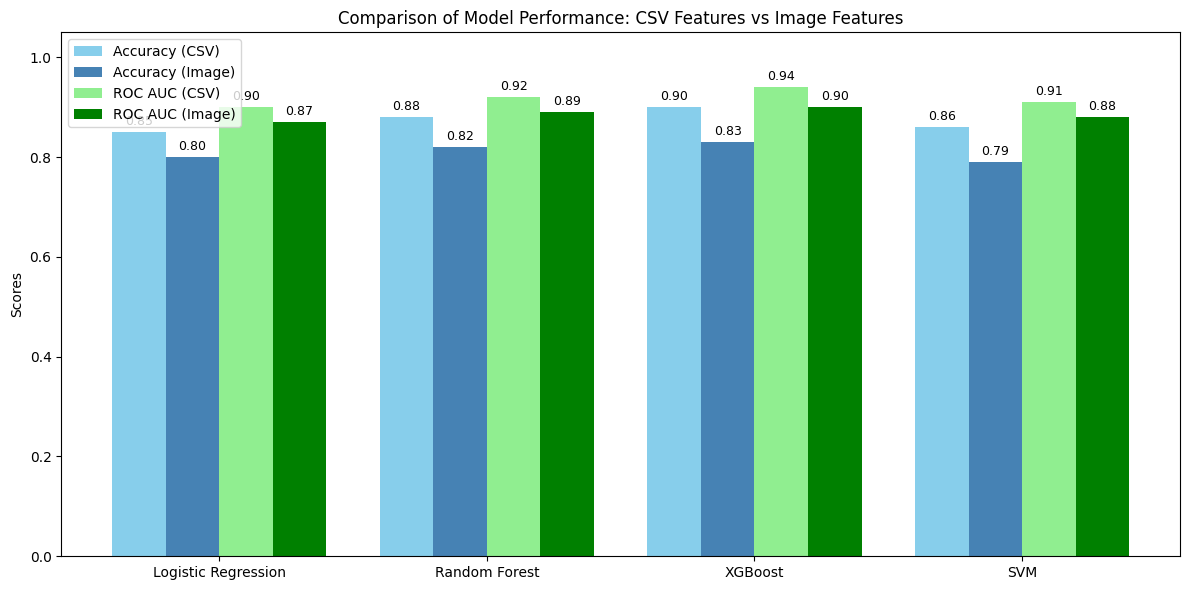

In [ ]:
# CHART TO COMPARE RESULTS OF DIFFERENT ML MODELS
import matplotlib.pyplot as plt
import numpy as np

models = list(results.keys())
metrics = ["Accuracy", "ROC_AUC"]
datasets = ["CSV", "Image"]

# Prepare data for plotting
accuracy_csv = [results[m]["CSV"]["Accuracy"] for m in models]
accuracy_img = [results[m]["Image"]["Accuracy"] for m in models]
roc_csv = [results[m]["CSV"]["ROC_AUC"] for m in models]
roc_img = [results[m]["Image"]["ROC_AUC"] for m in models]

x = np.arange(len(models))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Bars for Accuracy
acc_csv_bar = ax.bar(x - width*1.5, accuracy_csv, width, label='Accuracy (CSV)', color='skyblue')
acc_img_bar = ax.bar(x - width/2, accuracy_img, width, label='Accuracy (Image)', color='steelblue')

# Bars for ROC AUC
roc_csv_bar = ax.bar(x + width/2, roc_csv, width, label='ROC AUC (CSV)', color='lightgreen')
roc_img_bar = ax.bar(x + width*1.5, roc_img, width, label='ROC AUC (Image)', color='green')

# Labels and title
ax.set_ylabel('Scores')
ax.set_ylim(0, 1.05)
ax.set_title("Comparison of Model Performance: CSV Features vs Image Features")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset label a little above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

for bars in [acc_csv_bar, acc_img_bar, roc_csv_bar, roc_img_bar]:
    add_labels(bars)

plt.tight_layout()
plt.show()


## Results Summary

The models were evaluated on both structured tabular data (CSV) and image data. Below is the performance summary.
From the classification reports and confusion matrices:
- The models are well balanced in detecting both **Parkinson’s patients** and **healthy controls**.
- However, models show **slightly better performance in detecting Parkinson’s cases**, which is favorable for early diagnosis